In [52]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt

In [2]:
import xml.etree.ElementTree as ET
tree = ET.parse('./local-data/chat-baseline-300001-nsrr.xml')
root = tree.getroot()

In [3]:
root

<Element 'PSGAnnotation' at 0x10fb93170>

In [5]:
for child in root:
    print(child)

<Element 'SoftwareVersion' at 0x110209710>
<Element 'EpochLength' at 0x1102121d0>
<Element 'ScoredEvents' at 0x110212230>


In [6]:
root.tag

'PSGAnnotation'

In [11]:
root[0].text

'Compumedics'

In [21]:
from bs4 import BeautifulSoup

In [75]:
with open('./local-data/chat-baseline-300004-nsrr.xml') as fp:
    annot = BeautifulSoup(fp)

In [76]:
#annot.scoredevents.find_all('scoredevent')

In [77]:
duration = int(float(annot.scoredevents.scoredevent.duration.text))
duration

37545

In [78]:
def read_sleep_stages(total_duration, scored_events):
    #print(len(scored_events))
    stages = np.zeros(total_duration)
    for event in scored_events:
        event_type = event.eventtype.text.split('|')[0]
        if event_type == 'Stages':
            #print('type:', event_type)
            #print('concept:', event.eventconcept.text)
            #print('start:', event.start.text)
            #print('duration:', event.duration.text)
            concept = event.eventconcept.text.split('|')
            stage = concept[0]
            stage_no = int(concept[1])
            start = int(float(event.start.text))
            duration = int(float(event.duration.text))
            stages[start:start+duration] = stage_no
    return stages

In [79]:
stages = read_sleep_stages(duration, annot.scoredevents.find_all('scoredevent'))

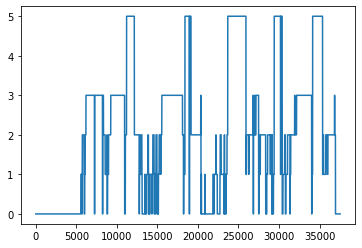

In [80]:
plt.plot(stages)